In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer

In [43]:
ohe = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()
ct = make_column_transformer (
     (ohe , ["sex","island"]),
     remainder = "passthrough", verbose_feature_names_out=False ,
)

In [44]:
ct.set_output(transform ="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['sex', 'island'])],
                  verbose_feature_names_out=False)

In [45]:
df_mod=ct.fit_transform(df)

In [46]:
df_mod.sample(10)

,sex_Female,sex_Male,island_Biscoe,island_Dream,island_Torgersen,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
315,0.0,1.0,1.0,0.0,0.0,Gentoo,50.8,15.7,226.0,5200.0
143,0.0,1.0,0.0,1.0,0.0,Adelie,40.7,17.0,190.0,3725.0
127,0.0,1.0,0.0,0.0,1.0,Adelie,41.5,18.3,195.0,4300.0
77,0.0,1.0,0.0,0.0,1.0,Adelie,37.2,19.4,184.0,3900.0
190,1.0,0.0,0.0,1.0,0.0,Chinstrap,46.9,16.6,192.0,2700.0
136,1.0,0.0,0.0,1.0,0.0,Adelie,35.6,17.5,191.0,3175.0
186,0.0,1.0,0.0,1.0,0.0,Chinstrap,49.7,18.6,195.0,3600.0
70,1.0,0.0,0.0,0.0,1.0,Adelie,33.5,19.0,190.0,3600.0
26,0.0,1.0,1.0,0.0,0.0,Adelie,40.6,18.6,183.0,3550.0
313,0.0,1.0,1.0,0.0,0.0,Gentoo,49.5,16.1,224.0,5650.0


In [47]:
df_mod = df_mod.drop(columns = ["sex_Female","island_Biscoe"])

In [48]:
df_mod.head()

,sex_Male,island_Dream,island_Torgersen,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.0,0.0,1.0,Adelie,39.1,18.7,181.0,3750.0
1,0.0,0.0,1.0,Adelie,39.5,17.4,186.0,3800.0
2,0.0,0.0,1.0,Adelie,40.3,18.0,195.0,3250.0
4,0.0,0.0,1.0,Adelie,36.7,19.3,193.0,3450.0
5,1.0,0.0,1.0,Adelie,39.3,20.6,190.0,3650.0


In [57]:
df_mod =df_mod.iloc[ : , [0,1,2,4,5,6,7,3]]

In [58]:
df_mod['species']= label_encoder.fit_transform(df['species']) 

In [59]:
df_mod.sample(10)

,sex_Male,island_Dream,island_Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
69,1.0,0.0,1.0,41.8,19.4,198.0,4450.0,0
100,0.0,0.0,0.0,35.0,17.9,192.0,3725.0,0
82,0.0,0.0,1.0,36.7,18.8,187.0,3800.0,0
188,0.0,1.0,0.0,47.6,18.3,195.0,3850.0,1
102,0.0,0.0,0.0,37.7,16.0,183.0,3075.0,0
217,1.0,1.0,0.0,49.6,18.2,193.0,3775.0,1
56,0.0,0.0,0.0,39.0,17.5,186.0,3550.0,0
112,0.0,0.0,0.0,39.7,17.7,193.0,3200.0,0
19,1.0,0.0,1.0,46.0,21.5,194.0,4200.0,0
161,1.0,1.0,0.0,51.3,19.9,198.0,3700.0,1


In [66]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex_Male           333 non-null    float64
 1   island_Dream       333 non-null    float64
 2   island_Torgersen   333 non-null    float64
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   species            333 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 23.4 KB


In [67]:
X=df_mod.iloc[:, :-1]
y=df_mod.iloc[:, -1]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =5, criterion='entropy', random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [70]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2])

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [74]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[39,  1,  0],
       [ 0,  9,  0],
       [ 0,  0, 18]])

Text(8.222222222222223, 0.5, 'Predicted')

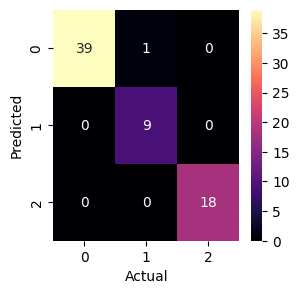

In [76]:
plt.figure(figsize=(3,3))

sns.heatmap(cm, annot=True, fmt='d', cmap='magma' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [80]:
print(accuracy_score(y_test,y_pred))

0.9850746268656716
